In [2]:
import matplotlib.pyplot as plt
import struct
import numpy as np

In [33]:
with open("failed_pixel741365.bin", "rb") as fin:
  samples_cnt = struct.unpack("i", fin.read(4))[0]
  samples = np.array(struct.unpack("f" * samples_cnt * 2, fin.read(4 * samples_cnt * 2))).reshape(samples_cnt, 2)
  labels = np.array(struct.unpack("i" * samples_cnt, fin.read(4 * samples_cnt)))
  line = struct.unpack("f" * 3, fin.read(4 * 3))

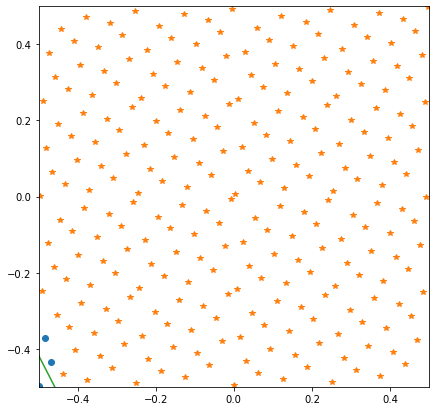

In [34]:
plt.figure(0, (7, 7))
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.plot(samples[labels == 1][:, 0], samples[labels == 1][:, 1], 'o')
plt.plot(samples[labels == -1][:, 0], samples[labels == -1][:, 1], '*')
x = np.linspace(-0.5, 0.5)
plt.plot(x, -(line[0] / line[1] * x + line[2] / line[1]))

# plt.plot([(-line[2] + 10 * line[0]) / line[1], -10], [(-line[2] - 10 * line[0]) / line[1], 10])
# plt.plot([10, (-line[2] - 10 * line[1]) / line[0]], [-10, (-line[2] + 10 * line[1]) / line[0]])
# plt.plot([-1000, (-line[2] + 1000 * line[1]) / line[0]], [(-line[2] + 1000 * line[0]) / line[1], -1000])

In [102]:
idx = 38
line[0] * samples[idx][0] + line[1] * samples[idx][1] + line[2]

-9.315718688070774

In [92]:
labels == 1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])